# Installs and settings

In [ ]:
%pip install pandas
%pip install catboost
%pip install xgboost
%pip install sklearn
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install csv
%pip install joblib
%pip install scipy
%pip install h5py scikit-optimize
%pip install optuna



In [1]:
import pandas as pd

import seaborn as sns

import csv

import xgboost
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

import catboost as cb
from catboost import CatBoostError

import joblib

import sklearn
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer , mean_squared_error, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics.pairwise import cosine_similarity

import optuna

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

import math

import statistics

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)


c:\Users\DASolodennikov\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Importing file and first analysis

In [3]:
# %%time
# data_chunk = pd.read_csv(f'Documents\_lead__202210181143.csv',chunksize=10_000, nrows=50_000)
# data_chunk

In [4]:
%%time
data_chunk = pd.read_csv(f'Documents\_lead__202210181143.csv',chunksize=100_000)
data_chunk

CPU times: total: 15.6 ms
Wall time: 6.01 ms


In [5]:
%%time
#storing the chunks after iterating from chunk object

chunk_data=[chunk for chunk in data_chunk]

#concatnating dataframes to make it a complete dataset

dataset=pd.concat(chunk_data)

<timed exec>:3: DtypeWarning: Columns (16,17,29,42,43,45,47,48,49,50,51,55,64,74,75,76,78) have mixed types. Specify dtype option on import or set low_memory=False.
<timed exec>:3: DtypeWarning: Columns (17,19,20,21,22,24,29,33,42,43,45,49,50,51,55,64,74,75,78) have mixed types. Specify dtype option on import or set low_memory=False.
<timed exec>:3: DtypeWarning: Columns (17,74,75) have mixed types. Specify dtype option on import or set low_memory=False.
<timed exec>:3: DtypeWarning: Columns (17,19,20,21,22,28,33,55,74,75) have mixed types. Specify dtype option on import or set low_memory=False.
<timed exec>:3: DtypeWarning: Columns (17,24,42,43,49,50,51,55,64,74,75) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: total: 8.08 s
Wall time: 8.09 s


In [6]:
dataset.info(memory_usage="deep")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427579 entries, 0 to 427578
Data columns (total 81 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   427579 non-null  int64  
 1   date_create          427579 non-null  object 
 2   date_modify          427579 non-null  object 
 3   created_by_id        427579 non-null  int64  
 4   modify_by_id         427579 non-null  int64  
 5   assigned_by_id       427579 non-null  int64  
 6   opened               427579 non-null  object 
 7   company_id           24062 non-null   float64
 8   contact_id           1435 non-null    float64
 9   status_id            427579 non-null  object 
 10  status_description   0 non-null       float64
 11  product_id           0 non-null       float64
 12  opportunity          427579 non-null  float64
 13  currency_id          427579 non-null  object 
 14  opportunity_account  427579 non-null  float64
 15  account_currency_

In [7]:
dataset

,id,date_create,date_modify,created_by_id,modify_by_id,assigned_by_id,opened,company_id,contact_id,status_id,...,partnerid,kvvatrub,kvrub,probability_sbs,probability,calendarization,kvpct,kpk,efsid,gwp
0,535670,2022-10-03 13:20:21.000,2022-10-05 11:25:58.000,1,1685,1685,N,NaN,NaN,CONVERTED,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,324084,2022-08-10 07:35:22.000,2022-10-05 09:36:42.000,1,2849,2849,N,NaN,NaN,27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,324372,2022-08-10 07:35:53.000,2022-10-05 09:35:55.000,1,2849,2849,N,NaN,NaN,27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,532596,2022-09-08 10:09:20.000,2022-10-05 12:31:15.000,1,2700,2700,N,NaN,NaN,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,535856,2022-10-04 14:41:27.000,2022-10-05 09:38:24.000,1,2868,2868,N,1007446.0,NaN,CONVERTED,...,18656.0,0.0,0.00,0,90,2022-10-05,0.0,NaN,NaN,1900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427574,470061,2022-08-10 16:03:20.000,2022-08-10 16:41:47.000,1,2153,2569,N,NaN,NaN,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
427575,536039,2022-10-05 12:02:08.000,2022-10-05 12:04:48.000,2147,2147,2147,Y,100502.0,NaN,3,...,18623.0,333934.0,278278.33,30,70,2022-11-03,20.0,NaN,NaN,1669670.0
427576,470426,2022-08-10 16:04:01.000,2022-08-10 16:04:01.000,1,1,2039,N,NaN,NaN,NEW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
427577,470708,2022-08-10 16:04:36.000,2022-08-10 16:04:36.000,1,1,2039,N,NaN,NaN,NEW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
dataset.value_counts()

Series([], dtype: int64)

In [9]:
dataset["date_create"] = pd.to_datetime(dataset["date_create"])
dataset["date_modify"] = pd.to_datetime(dataset["date_modify"])
dataset["calendarization"] = pd.to_datetime(dataset["calendarization"],  errors = 'coerce')
dataset["date_closed"] = pd.to_datetime(dataset["date_closed"])


In [10]:
# Categorical types
dataset["opened"] = dataset["opened"].astype("category")
dataset["currency_id"] = dataset["currency_id"].astype("category")
dataset["account_currency_id"] = dataset["account_currency_id"].astype("category")
dataset["currency_id"] = dataset["currency_id"].astype("category")
dataset["status_id"] = dataset["status_id"].astype("category")
dataset["honorific"] = dataset["honorific"].astype("category")
dataset["has_phone"] = dataset["has_phone"].astype("category")
dataset["has_email"] = dataset["has_email"].astype("category")
dataset["status_semantic_id"] = dataset["status_semantic_id"].astype("category")
dataset["is_return_customer"] = dataset["is_return_customer"].astype("category")
dataset["prodcategoryid"] = dataset["prodcategoryid"].astype("category")
dataset["crm_import_file"] = dataset["crm_import_file"].astype("category")
dataset["crm_file"] = dataset["crm_file"].astype("category")
dataset["file_error"] = dataset["file_error"].astype("category")
dataset["pledgeid"] = dataset["pledgeid"].astype("category")
dataset["pl_checkbox"] = dataset["pl_checkbox"].astype("category")
dataset["saleschannelid"] = dataset["saleschannelid"].astype("category")



In [11]:
dataset.info(memory_usage="deep")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427579 entries, 0 to 427578
Data columns (total 81 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   id                   427579 non-null  int64         
 1   date_create          427579 non-null  datetime64[ns]
 2   date_modify          427579 non-null  datetime64[ns]
 3   created_by_id        427579 non-null  int64         
 4   modify_by_id         427579 non-null  int64         
 5   assigned_by_id       427579 non-null  int64         
 6   opened               427579 non-null  category      
 7   company_id           24062 non-null   float64       
 8   contact_id           1435 non-null    float64       
 9   status_id            427579 non-null  category      
 10  status_description   0 non-null       float64       
 11  product_id           0 non-null       float64       
 12  opportunity          427579 non-null  float64       
 13  currency_id   

# Cleaning up dataset

## Deleting columns

In [12]:
dataset.drop('comments', axis=1, inplace=True)

dataset.drop('full_name', axis=1, inplace=True)
dataset.drop('name', axis=1, inplace=True)
dataset.drop('second_name', axis=1, inplace=True)
dataset.drop('title', axis=1, inplace=True)
dataset.drop('id', axis=1, inplace=True)
dataset.drop('source_description', axis=1, inplace=True)
dataset.drop('address', axis=1, inplace=True)
dataset.drop('status_description', axis=1, inplace=True)
dataset.drop('product_id', axis=1, inplace=True) 
dataset.drop('search_content', axis=1, inplace=True) #IDK ABOUT THIS ONE
#dataset.drop('client_fio', axis=1, inplace=True) #
dataset.drop('currency_id', axis=1, inplace=True) #
dataset.drop('account_currency_id', axis=1, inplace=True) #
dataset.drop('exch_rate', axis=1, inplace=True) # dataset.drop(dataset[dataset['exch_rate'] == 64.36 ].index, inplace = True)
dataset.drop('birthday_sort', axis=1, inplace=True) #
dataset.drop('client_phone', axis=1, inplace=True) #
dataset.drop('has_imol', axis=1, inplace=True) #


## Dealing with Nulls

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427579 entries, 0 to 427578
Data columns (total 64 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   date_create          427579 non-null  datetime64[ns]
 1   date_modify          427579 non-null  datetime64[ns]
 2   created_by_id        427579 non-null  int64         
 3   modify_by_id         427579 non-null  int64         
 4   assigned_by_id       427579 non-null  int64         
 5   opened               427579 non-null  category      
 6   company_id           24062 non-null   float64       
 7   contact_id           1435 non-null    float64       
 8   status_id            427579 non-null  category      
 9   opportunity          427579 non-null  float64       
 10  opportunity_account  427579 non-null  float64       
 11  source_id            422546 non-null  object        
 12  last_name            460 non-null     object        
 13  company_title 

In [14]:
dataset.isnull().sum()

date_create             0
date_modify             0
created_by_id           0
modify_by_id            0
assigned_by_id          0
                    ...  
calendarization    412053
kvpct              394446
kpk                418745
efsid              427579
gwp                390214
Length: 64, dtype: int64

In [15]:
# df = dataset.dropna(axis=1,  
#                 thresh=1_000).copy() #.copy() is only here to suppress a warning.
# df['contact_id'] = dataset['contact_id']
# df.info()

In [16]:
df = dataset.dropna(axis=1,  # WAS 15_000
                thresh=15_000).copy() #.copy() is only here to suppress a warning.
df['contact_id'] = dataset['contact_id']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427579 entries, 0 to 427578
Data columns (total 47 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   date_create          427579 non-null  datetime64[ns]
 1   date_modify          427579 non-null  datetime64[ns]
 2   created_by_id        427579 non-null  int64         
 3   modify_by_id         427579 non-null  int64         
 4   assigned_by_id       427579 non-null  int64         
 5   opened               427579 non-null  category      
 6   company_id           24062 non-null   float64       
 7   status_id            427579 non-null  category      
 8   opportunity          427579 non-null  float64       
 9   opportunity_account  427579 non-null  float64       
 10  source_id            422546 non-null  object        
 11  company_title        372983 non-null  object        
 12  date_closed          183380 non-null  datetime64[ns]
 13  has_phone     

In [ ]:
for col in df:
  print("\n")
  print(col,df[col].unique())

In [18]:
for col in df:
  print(col,df[col].nunique())

date_create 117502
date_modify 159131
created_by_id 226
modify_by_id 333
assigned_by_id 369
opened 2
company_id 18220
status_id 32
opportunity 299
opportunity_account 299
source_id 57
company_title 238427
date_closed 81520
has_phone 2
has_email 2
status_semantic_id 3
is_return_customer 2
region_title 504
km_fio 15185
gosb 702
client_inn 269310
client_fio 50843
bsubdivision 13
tdid 15
gosbid 103
sales_company_code 9
oldinstypeid 50
risklist 58
prodcategoryid 8
prodtypeid 37
crm_import_file 2
crm_file 30
pledgeid 2
dealid 35388
pl_checkbox 2
instypeid 102
segmentid 13
saleschannelid 3
partnerid 46
kvvatrub 5205
kvrub 5221
probability_sbs 57
probability 68
calendarization 419
kvpct 116
gwp 6045
contact_id 1114


In [ ]:
df['source_id'].value_counts()

In [20]:
#Cleaning Nulls 

def preprocessing_probability(data):
  data["probability_sbs"]=data["probability_sbs"].astype(str).apply(lambda x: x.split('%')[0].split(',')[0])
  data["probability"]=data["probability"].astype(str).apply(lambda x: x.split('%')[0].split(',')[0])
  return None
  
def preprocessing_zeroing(data):
  data["kvvatrub"]=data["kvvatrub"].fillna(0)
  #data["kvpct"]=data["kvpct"].astype(str).apply(lambda x: x.split('%')[0].split(',')[0])
  return None

def run_pipe(dff):
  preprocessing = Pipeline(steps=[
    # преобразуем признаки, исходя из прошлого анализа
    ('probability_sbs', FunctionTransformer(preprocessing_probability(dff)))
    ]
    )
  return preprocessing.fit_transform(dff)
df = pd.DataFrame(run_pipe(df))

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427579 entries, 0 to 427578
Data columns (total 47 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   date_create          427579 non-null  datetime64[ns]
 1   date_modify          427579 non-null  datetime64[ns]
 2   created_by_id        427579 non-null  int64         
 3   modify_by_id         427579 non-null  int64         
 4   assigned_by_id       427579 non-null  int64         
 5   opened               427579 non-null  category      
 6   company_id           24062 non-null   float64       
 7   status_id            427579 non-null  category      
 8   opportunity          427579 non-null  float64       
 9   opportunity_account  427579 non-null  float64       
 10  source_id            422546 non-null  object        
 11  company_title        372983 non-null  object        
 12  date_closed          183380 non-null  datetime64[ns]
 13  has_phone     

# ML

## Encoding

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427579 entries, 0 to 427578
Data columns (total 47 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   date_create          427579 non-null  datetime64[ns]
 1   date_modify          427579 non-null  datetime64[ns]
 2   created_by_id        427579 non-null  int64         
 3   modify_by_id         427579 non-null  int64         
 4   assigned_by_id       427579 non-null  int64         
 5   opened               427579 non-null  category      
 6   company_id           24062 non-null   float64       
 7   status_id            427579 non-null  category      
 8   opportunity          427579 non-null  float64       
 9   opportunity_account  427579 non-null  float64       
 10  source_id            422546 non-null  object        
 11  company_title        372983 non-null  object        
 12  date_closed          183380 non-null  datetime64[ns]
 13  has_phone     

In [23]:
encoder = preprocessing.LabelEncoder()

df['source_id']=df['source_id'].astype(str)

encoded_dataframe = df.copy()

for col in df:
    print("Column: " + col )
    print("Type: ",df[col].dtype)
    encoded_dataframe[col] = encoder.fit_transform(df[col])
    print()


Column: date_create
Type:  datetime64[ns]

Column: date_modify
Type:  datetime64[ns]

Column: created_by_id
Type:  int64

Column: modify_by_id
Type:  int64

Column: assigned_by_id
Type:  int64

Column: opened
Type:  category

Column: company_id
Type:  float64

Column: status_id
Type:  category

Column: opportunity
Type:  float64

Column: opportunity_account
Type:  float64

Column: source_id
Type:  object

Column: company_title
Type:  object

Column: date_closed
Type:  datetime64[ns]

Column: has_phone
Type:  category

Column: has_email
Type:  category

Column: status_semantic_id
Type:  category

Column: is_return_customer
Type:  category

Column: region_title
Type:  object

Column: km_fio
Type:  object

Column: gosb
Type:  object

Column: client_inn
Type:  object

Column: client_fio
Type:  object

Column: bsubdivision
Type:  object

Column: tdid
Type:  float64

Column: gosbid
Type:  float64

Column: sales_company_code
Type:  object

Column: oldinstypeid
Type:  float64

Column: risklist

In [24]:
X = encoded_dataframe.drop(labels='opened', axis=1)
y = encoded_dataframe['opened']
x_train , x_test , y_train , y_test = train_test_split(X, y, test_size=0.3,random_state=42, stratify=y)

## Using Xgboost Optuna

In [25]:
def objective(trial,data=X,target=y):
    

    train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.3,random_state=42, stratify=y)
    param = {
        "verbosity": 1, 
        'booster': trial.suggest_categorical('booster', ["gbtree", "gblinear", "dart"]),

        'n_estimators': trial.suggest_int('n_estimators', 5_000, 10_000),
        'early_stopping_rounds':500, #3
        'max_bin': trial.suggest_int('max_bin', 50, 750,1),
        'objective':'binary:logistic',
        'eval_metric':f1_eval,
        'alpha' : trial.suggest_float('alpha', 1e-5, 3.0),
        'lambda' : trial.suggest_float('lambda', 1e-5, 3.0),


    }
    #"""
    if param["booster"] in ["gbtree","dart"]:

        param['num_parallel_tree']= trial.suggest_int('num_parallel_tree', 2, 20)
        param['learning_rate']= trial.suggest_categorical('learning_rate', np.arange(1e-6,5.0,0.00001))
        param['gamma'] =  trial.suggest_categorical('gamma', np.arange(1e-6,20.0,0.00005))
        param['max_depth'] = trial.suggest_int('max_depth',1, 20)
        param['min_child_weight'] = trial.suggest_int('min_child_weight', 1, 30)
        param['max_delta_step'] = trial.suggest_int('max_delta_step', 1, 30)
        param['subsample'] = trial.suggest_float('subsample',  1e-5, 1.0)
        

        param['tree_method']=trial.suggest_categorical('tree_method', ['auto', 'exact', 'approx', 'hist']) #gpu_hist  #  this parameter means using the GPU when training our model to speedup the training process
        param['refresh_leaf'] = trial.suggest_categorical('refresh_leaf', [0,1])
        param['sketch_eps'] = trial.suggest_float('sketch_eps',  1e-5, 1.0)


        if param['tree_method'] == "gpu_hist":
            param['sampling_method'] = 'gradient_based'
        else:
            param['sampling_method'] = 'uniform'
        
        if param['tree_method'] in ["hist", "approx","gpu_hist"]:
            param['grow_policy'] = trial.suggest_categorical('grow_policy', ["depthwise","lossguide"])
        
        if param['tree_method'] != "exact":
            param['max_leaves'] = trial.suggest_int('max_leaves',0, 18)


        if param["booster"] == "dart":
            param['sample_type'] = trial.suggest_categorical('sample_type', ["uniform","weighted"])
            param['normalize_type'] = trial.suggest_categorical('normalize_type', ["tree","forest"])
            param['rate_drop'] = trial.suggest_float('rate_drop',  1e-5, 1.0)
            param['one_drop'] = trial.suggest_categorical('one_drop', [0,1])
            param['skip_drop'] = trial.suggest_float('skip_drop', 1e-5, 1.0)


    if param["booster"] == "gblinear":

        param['updater'] = trial.suggest_categorical('updater', ["shotgun","coord_descent"])
        param['feature_selector'] = trial.suggest_categorical('feature_selector', ["cyclic","shuffle"])
    #"""


    """
    model = XGBClassifier(**param)
    model.fit(train_x,train_y,eval_set=[(test_x,test_y)], verbose=False )
    preds = model.predict(test_x)
    #return metrics.average_precision_score(test_y, preds)
    return f1_eval(preds, test_y), accuracy_score(test_y, preds), f1_score(test_y, preds), metrics.average_precision_score(test_y, preds)
    #return metrics.average_precision_score(test_y, preds)
    #return metrics.f1_score(preds, test_y)
    """
    #print(param)
    model = XGBClassifier(**param)
    pruning_callback = optuna.integration.XGBoostPruningCallback(trial, 'validation_0' + '-f1_eval')
    model.fit(train_x,train_y,eval_set=[(test_x,test_y)], verbose=0 ,callbacks=[pruning_callback] )
    preds = model.predict(test_x)

    joblib.dump(study, 'xgboost_leads.pkl')
    #print(test_y)
    #print(preds)
    return (metrics.f1_score(test_y, preds))
    #return f1_eval(preds, test_y)

    
    #rmse = mean_squared_error(test_y, preds,squared=False)
    
    #return (model.score(test_x , test_y)) # (model.score(x_train , y_train))
    #return roc_auc_score(test_y, preds)
    #return (metrics.f1_score(test_y, preds))


In [26]:
def logging_callback(study, frozen_trial):
    previous_best_value = study.user_attrs.get("previous_best_value", None)
    if previous_best_value != study.best_value:
        study.set_user_attr("previous_best_value", study.best_value)
        print(
            "\nWARNING\nTrial {} finished with best value: {} and parameters: {}.\n ".format(
            frozen_trial.number,
            frozen_trial.value,
            frozen_trial.params,
            )
        )

In [27]:
def f1_eval(y_pred, dtrain):
    #y_true = dtrain.get_label()
    y_true = np.rint(dtrain)
    err = f1_score(y_true, (y_pred))
    return err

In [ ]:
%%time
warnings.filterwarnings("ignore")

if os.path.isfile('xgboost_leads.pkl'):
    study = joblib.load('xgboost_leads.pkl')
else:
    sampler = optuna.samplers.TPESampler(multivariate=True)

    study = optuna.create_study(direction='maximize' , sampler = sampler 
    ,pruner=optuna.pruners.MedianPruner(n_warmup_steps=30,n_startup_trials=20))

#study = optuna.create_study(directions=['maximize', 'maximize','maximize','maximize'])
    
study.optimize(objective, n_trials=1_000,
            show_progress_bar=True, n_jobs=-1, gc_after_trial=True,
            callbacks=[logging_callback]
            )

In [2]:
study = joblib.load('xgboost_leads.pkl')

In [3]:
optuna.visualization.plot_optimization_history(study)


In [4]:
optuna.visualization.plot_parallel_coordinate(study)


[W 2022-11-16 15:03:19,965] Your study has only completed trials with missing parameters.


In [5]:
optuna.visualization.plot_slice(study)


In [6]:
print('Number of finished trials:', len(study.  trials))
print('Best trial:', study.best_trial.params)

Number of finished trials: 34
Best trial: {'booster': 'gbtree', 'n_estimators': 8395, 'max_bin': 143, 'alpha': 2.8074900825955296, 'lambda': 2.993619720263007, 'num_parallel_tree': 2, 'learning_rate': 1.790081, 'gamma': 2.034101, 'max_depth': 11, 'min_child_weight': 7, 'max_delta_step': 8, 'subsample': 0.9996263223280529, 'tree_method': 'exact', 'refresh_leaf': 0, 'sketch_eps': 0.6854191271740302}


In [ ]:
Best_trial = study.best_trial.params
Best_trial

{'booster': 'gbtree',
 'n_estimators': 8751,
 'max_bin': 145,
 'num_parallel_tree': 6,
 'learning_rate': 4.23617,
 'gamma': 1.09105,
 'max_depth': 11,
 'min_child_weight': 25,
 'max_delta_step': 27,
 'subsample': 0.07529162492701132,
 'lambda': 0.45466711823707123,
 'alpha': 2.4812805589116684,
 'tree_method': 'auto',
 'refresh_leaf': 1,
 'max_leaves': 16,
 'sketch_eps': 0.6906346062820033}

In [ ]:
study.best_trial.value


0.9946893428469031

In [65]:
model = XGBClassifier()  


In [66]:
model.set_params(**study.best_params)
model.fit(X, y)

In [ ]:
# Показать самые важные фичи
model.feature_importances_

In [ ]:
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

In [ ]:
plot_importance(model)
plt.show()

In [ ]:
sorted_idx = model.feature_importances_.argsort()
plt.barh(df.feature_names[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

## Using Xgboost CV Optuna

In [ ]:
def objective(trial,data=X,target=y):
    

    train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.3,random_state=42, stratify=y)
    param = {
        "verbosity": 0, 
        'booster': trial.suggest_categorical('booster', ["gbtree", "gblinear", "dart"]),

        'n_estimators': trial.suggest_int('n_estimators', 5_000, 10_000),
        'early_stopping_rounds':800, #3
        'max_bin': trial.suggest_int('max_bin', 50, 750,1),

        #'eval_metric':metrics.average_precision_score
        #'eval_metric':f1_eval
        #'eval_metric':metrics.f1_score,
    }
    #"""
    if param["booster"] in ["gbtree","dart"]:

        #param['scale_pos_weight'] = trial.suggest_int('scale_pos_weight',1, 15)


        param['num_parallel_tree']= trial.suggest_int('num_parallel_tree', 2, 20)
        param['tree_method']=trial.suggest_categorical('tree_method', ['auto', 'exact', 'approx', 'hist']) #gpu_hist  #  this parameter means using the GPU when training our model to speedup the training process
        param['learning_rate']= trial.suggest_categorical('learning_rate', np.arange(0.00000,5.0,0.00001))
        param['gamma'] =  trial.suggest_categorical('gamma', np.arange(0.00000,20.0,0.00005))
        param['max_depth'] = trial.suggest_int('max_depth',1, 20)
        param['min_child_weight'] = trial.suggest_int('min_child_weight', 1, 30)
        param['max_delta_step'] = trial.suggest_int('max_delta_step', 1, 30)
        param['subsample'] = trial.suggest_float('subsample',  1e-5, 1.0)

        if param['tree_method'] == "gpu_hist":
            param['sampling_method'] = 'gradient_based'
        else:
            param['sampling_method'] = 'uniform'
        
        param['lambda'] = trial.suggest_float('lambda', 1e-5, 1.0)

        param['alpha'] = trial.suggest_float('alpha', 1e-5, 2.0)
        param['sketch_eps'] = trial.suggest_float('sketch_eps',  1e-5, 1.0)
        param['refresh_leaf'] = trial.suggest_categorical('refresh_leaf', [0,1])

        if param['tree_method'] in ["hist", "approx","gpu_hist"]:
            param['grow_policy'] = trial.suggest_categorical('grow_policy', ["depthwise","lossguide"])
        
        if param['tree_method'] != "exact":
            param['max_leaves'] = trial.suggest_int('max_leaves',0, 15)

        param['num_parallel_tree'] = trial.suggest_int('scale_pos_weight',0, 15)

        if param["booster"] == "dart":
            param['sample_type'] = trial.suggest_categorical('sample_type', ["uniform","weighted"])
            param['normalize_type'] = trial.suggest_categorical('normalize_type', ["tree","forest"])
            param['rate_drop'] = trial.suggest_float('rate_drop',  1e-5, 1.0)
            param['one_drop'] = trial.suggest_categorical('one_drop', [0,1])
            param['skip_drop'] = trial.suggest_float('skip_drop', 1e-5, 1.0)


    if param["booster"] == "gblinear":
        param['alpha'] = trial.suggest_float('alpha', 1e-5, 2.0)
        param['lambda'] = trial.suggest_float('lambda', 1e-5, 2.0)
        param['updater'] = trial.suggest_categorical('updater', ["shotgun","coord_descent"])
        param['feature_selector'] = trial.suggest_categorical('feature_selector', ["cyclic","shuffle"])
        #param['feature_selector'] = trial.suggest_categorical('feature_selector', ["cyclic","shuffle","random","greedy","thrifty"])
    #"""


    """
    model = XGBClassifier(**param)
    model.fit(train_x,train_y,eval_set=[(test_x,test_y)], verbose=False )
    preds = model.predict(test_x)
    #return metrics.average_precision_score(test_y, preds)
    return f1_eval(preds, test_y), accuracy_score(test_y, preds), f1_score(test_y, preds), metrics.average_precision_score(test_y, preds)
    #return metrics.average_precision_score(test_y, preds)
    #return metrics.f1_score(preds, test_y)
    """


    data_dmatrix = xgboost.DMatrix(data=train_x,label=train_y)

    xgb_cv = xgboost.cv(
    params = param,
    shuffle=True,
    stratified=True,
    dtrain = data_dmatrix,
    num_boost_round=300,  # Maximum iterations param['n_estimators']
    nfold=10, # Number of folds to use
    metrics = 'auc', # List of evaluation metrics to be used in cross validation, when it is not specified, the evaluation metric is chosen according to objective function.
    as_pandas = True,
    maximize=True,
    seed = 42, # Training with a validation set will stop if the performance doesn't improve for n rounds.
    )
    #print(xgb_cv)

    joblib.dump(study, 'xgboost_leads_CV.pkl')

    return statistics.mean((xgb_cv['test-auc-mean'])) , statistics.mean((xgb_cv['test-auc-std']))
    

    
    #rmse = mean_squared_error(test_y, preds,squared=False)
    
    #return (model.score(test_x , test_y)) # (model.score(x_train , y_train))
    #return roc_auc_score(test_y, preds)
    #return (metrics.f1_score(test_y, preds))


In [ ]:
def logging_callback(study, frozen_trial):
    previous_best_value = study.user_attrs.get("previous_best_value", None)
    if previous_best_value != study.best_value:
        study.set_user_attr("previous_best_value", study.best_value)
        print(
            "\nWARNING\nTrial {} finished with best value: {} and parameters: {}.\n ".format(
            frozen_trial.number,
            frozen_trial.value,
            frozen_trial.params,
            )
        )

In [ ]:
def f1_eval(y_pred, dtrain):
    #y_true = dtrain.get_label()
    y_true = np.rint(dtrain)
    err = f1_score(y_true, np.round(y_pred))
    return err

In [ ]:
%%time

if os.path.isfile('xgboost_leads_CV.pkl'):
    study = joblib.load('xgboost_leads_CV.pkl')
else:
    sampler = optuna.samplers.TPESampler(multivariate=True)
    study = optuna.create_study(direction='maximize', sampler=sampler)
#study = optuna.create_study(directions=['maximize','maximize'])
#study = optuna.create_study(directions=['maximize', 'maximize','maximize','maximize'])
    
study.optimize(objective, n_trials=1_000,
               show_progress_bar=True, n_jobs=-1, gc_after_trial=True,
               callbacks=[logging_callback])

In [40]:
study = joblib.load('xgboost_leads_CV.pkl')

In [43]:
optuna.visualization.plot_optimization_history(study, target = y_train)


C:\Users\dasolodennikov\AppData\Roaming\Python\Python310\site-packages\optuna\visualization\_utils.py:69: UserWarning:

`target` is specified, but `target_name` is the default value, 'Objective Value'.

[W 2022-10-31 13:25:13,634] There are no complete trials.


In [41]:
optuna.visualization.plot_parallel_coordinate(study, target = y_train)


C:\Users\dasolodennikov\AppData\Roaming\Python\Python310\site-packages\optuna\visualization\_utils.py:69: UserWarning: `target` is specified, but `target_name` is the default value, 'Objective Value'.
  warnings.warn(
[W 2022-10-31 13:24:40,146] Your study does not have any completed trials.


In [28]:
optuna.visualization.plot_slice(study)


ValueError: If the `study` is being used for multi-objective optimization, please specify the `target`.

In [29]:
print('Number of finished trials:', len(study.  trials))
print('Best trial:', study.best_trial.params)

Number of finished trials: 24


RuntimeError: A single best trial cannot be retrieved from a multi-objective study. Consider using Study.best_trials to retrieve a list containing the best trials.

In [32]:
Best_trial = study.best_trials
Best_trial

[]

In [35]:
study.best_trials


[]

In [36]:
model = XGBClassifier()  


In [37]:
model.set_params(**study.best_params)
model.fit(X, y)

RuntimeError: A single best trial cannot be retrieved from a multi-objective study. Consider using Study.best_trials to retrieve a list containing the best trials.

In [38]:
# Показать самые важные фичи
model.feature_importances_

NotFittedError: need to call fit or load_model beforehand

In [ ]:
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

In [ ]:
plot_importance(model)
plt.show()

In [ ]:
sorted_idx = model.feature_importances_.argsort()
plt.barh(df.feature_names[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

## Using Catboost Optuna

In [25]:
def objective(trial,data=X,target=y):
    
    train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.3,random_state=42, stratify=y)
    #kf = KFold(n_splits=10,random_state=42,shuffle=True)


    param = {
        'loss_function': trial.suggest_categorical('loss_function',['Logloss', 'CrossEntropy']),
        'eval_metric' : trial.suggest_categorical('eval_metric',['F1', 'CrossEntropy']),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf',1, 17),
        'bagging_temperature': trial.suggest_float('bagging_temperature',1.00001, 17), 
        'rsm': trial.suggest_float('rsm', 1e-6, 1.0), 
        'fold_permutation_block': trial.suggest_int('fold_permutation_block',1, 15),
        'leaf_estimation_iterations': trial.suggest_int('leaf_estimation_iterations',1, 12), 
        'learning_rate': trial.suggest_float('learning_rate', 1e-7,1),
        'reg_lambda': trial.suggest_float('reg_lambda', 1.0, 12), 
        'leaf_estimation_backtracking': trial.suggest_categorical('leaf_estimation_backtracking', ['No','AnyImprovement']),
        'depth': trial.suggest_int('depth',1, 16),
        'allow_const_label': trial.suggest_categorical('allow_const_label', [True, False]),
        'fold_len_multiplier': trial.suggest_float('fold_len_multiplier', 1, 12),
        'score_function': trial.suggest_categorical('score_function', ['Cosine', 'L2']),

        'boosting_type': trial.suggest_categorical('boosting_type', ['Ordered', 'Plain']),

        'langevin': trial.suggest_categorical('langevin', [True, False]),

        'iterations': trial.suggest_int('iterations', 2000, 7000),
        'max_bin': trial.suggest_int('max_bin', 90, 600,1),
    }

    
    
    if param['loss_function'] not in ["MultiCrossEntropy","MultiLogloss", 'CrossEntropy']:
      param['auto_class_weights']= trial.suggest_categorical('auto_class_weights', ['None','Balanced','SqrtBalanced'])

    if param["boosting_type"] == "Ordered":
      param['grow_policy']= 'SymmetricTree'

    if param["boosting_type"] == "Plain":
      param['grow_policy']= trial.suggest_categorical('grow_policy', ['SymmetricTree','Depthwise','Lossguide'])    


    if param["grow_policy"] != "Lossguide":
      param['sampling_frequency']= trial.suggest_categorical('sampling_frequency', ['PerTree','PerTreeLevel'])


    if param["langevin"]==True:
      param["posterior_sampling"] = trial.suggest_categorical('posterior_sampling', [True, False])
  
      if param["posterior_sampling"] == True:
        param['model_shrink_mode']= 'Constant'

      else:
        param['model_shrink_mode']= trial.suggest_categorical('model_shrink_mode', ['Constant', 'Decreasing'])


    #END OF SETTINGS

    print(param)
    model = cb.CatBoostClassifier(**param)  
    model.fit(train_x,train_y,eval_set=[(test_x,test_y)],early_stopping_rounds=500,verbose=False)
    


    #preds = model.predict(test_x)
    
    #rmse = mean_squared_error(test_y, preds,squared=False)
    #return (model.score(test_x , test_y))

    ### ANOTHER METHOD ###

    preds = model.predict(test_x)
    pred_labels = np.rint(preds)
    accuracy = sklearn.metrics.balanced_accuracy_score(test_y, pred_labels) #OR ROC_AUG OR accuracy_score

    
    joblib.dump(study, 'catboost_leads.pkl')

    return accuracy

In [26]:
def logging_callback(study, frozen_trial):
    previous_best_value = study.user_attrs.get("previous_best_value", None)
    if previous_best_value != study.best_value:
        study.set_user_attr("previous_best_value", study.best_value)
        print(
            "\nAHTUNG\nTrial {} finished with best value: {} and parameters: {}.\n ".format(
            frozen_trial.number,
            frozen_trial.value,
            frozen_trial.params,
            )
        )

In [ ]:
%%time

if os.path.isfile('catboost_leads.pkl'):
  study = joblib.load('catboost_leads.pkl')
else:
    sampler = optuna.samplers.TPESampler(multivariate=True)
    study = optuna.create_study(direction='maximize', load_if_exists=True,sampler=sampler)

study.optimize(objective, n_trials=1_000, #gc_after_trial=True,
              show_progress_bar=True, n_jobs=-1, callbacks=[logging_callback])
joblib.dump(study, 'catboost_leads.pkl')

In [25]:
study = joblib.load('catboost_leads.pkl')

In [26]:
optuna.visualization.plot_optimization_history(study)


In [27]:
optuna.visualization.plot_parallel_coordinate(study)


In [28]:
optuna.visualization.plot_slice(study)


In [29]:
Best_trial = study.best_trial.params
Best_trial

{'loss_function': 'Logloss',
 'eval_metric': 'F1',
 'min_data_in_leaf': 1,
 'bagging_temperature': 7.177752639476715,
 'rsm': 0.25373685280851005,
 'fold_permutation_block': 5,
 'leaf_estimation_iterations': 8,
 'learning_rate': 0.5783919724193177,
 'reg_lambda': 8.179313834932685,
 'leaf_estimation_backtracking': 'No',
 'depth': 3,
 'allow_const_label': False,
 'fold_len_multiplier': 10.257261937897766,
 'score_function': 'Cosine',
 'boosting_type': 'Plain',
 'langevin': True,
 'iterations': 4310,
 'max_bin': 422,
 'auto_class_weights': 'SqrtBalanced',
 'grow_policy': 'Lossguide',
 'posterior_sampling': True}

In [30]:
study.best_trial.value


0.9998581635571371

In [31]:
model = cb.CatBoostClassifier()  


In [32]:
model.set_params(**study.best_params)
model.fit(X, y)

C:\Users\dasolodennikov\AppData\Roaming\Python\Python310\site-packages\catboost\core.py:1419: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



0:	learn: 0.9955228	total: 122ms	remaining: 8m 45s
1:	learn: 0.9959873	total: 228ms	remaining: 8m 10s
2:	learn: 0.9970005	total: 286ms	remaining: 6m 50s
3:	learn: 0.9983141	total: 342ms	remaining: 6m 8s
4:	learn: 0.9984852	total: 399ms	remaining: 5m 43s
5:	learn: 0.9984995	total: 454ms	remaining: 5m 25s
6:	learn: 0.9987384	total: 522ms	remaining: 5m 20s
7:	learn: 0.9987636	total: 582ms	remaining: 5m 13s
8:	learn: 0.9987929	total: 640ms	remaining: 5m 5s
9:	learn: 0.9988993	total: 710ms	remaining: 5m 5s
10:	learn: 0.9990221	total: 772ms	remaining: 5m 1s
11:	learn: 0.9991326	total: 841ms	remaining: 5m 1s
12:	learn: 0.9991496	total: 901ms	remaining: 4m 57s
13:	learn: 0.9991958	total: 975ms	remaining: 4m 59s
14:	learn: 0.9991804	total: 1.06s	remaining: 5m 4s
15:	learn: 0.9992020	total: 1.14s	remaining: 5m 5s
16:	learn: 0.9992092	total: 1.23s	remaining: 5m 9s
17:	learn: 0.9992226	total: 1.29s	remaining: 5m 7s
18:	learn: 0.9992118	total: 1.35s	remaining: 5m 5s
19:	learn: 0.9993109	total: 1.43

In [36]:
statistics.mean(sklearn.model_selection.cross_val_score(model, x_train, y_train, cv=10, scoring='f1', n_jobs=-1))

In [33]:
model.get_feature_importance

<bound method CatBoost.get_feature_importance of <catboost.core.CatBoostClassifier object at 0x0000021C50BBF280>>

Text(0.5, 1.0, 'Feature Importance')

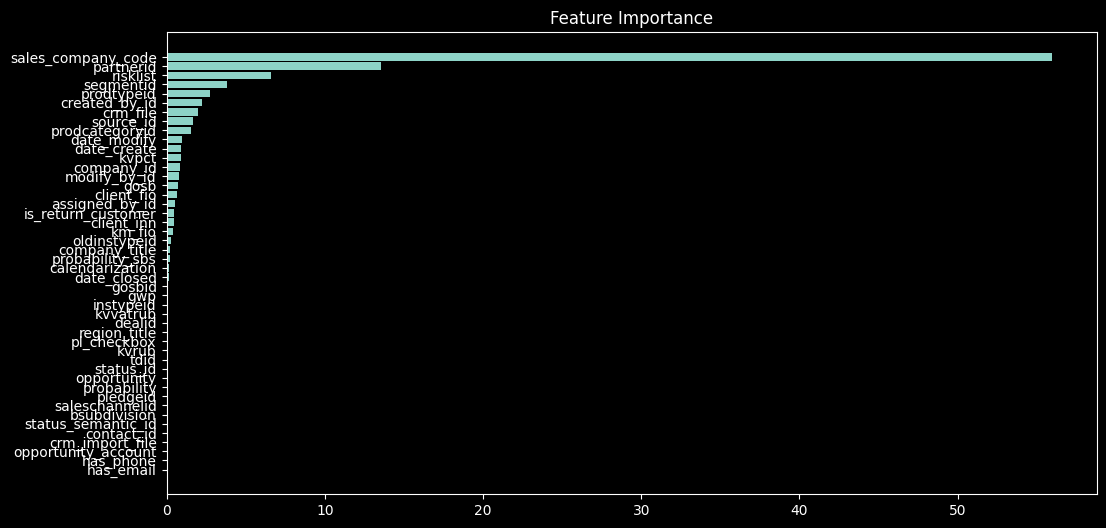

In [34]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(x_test.columns)[sorted_idx])
plt.title('Feature Importance')


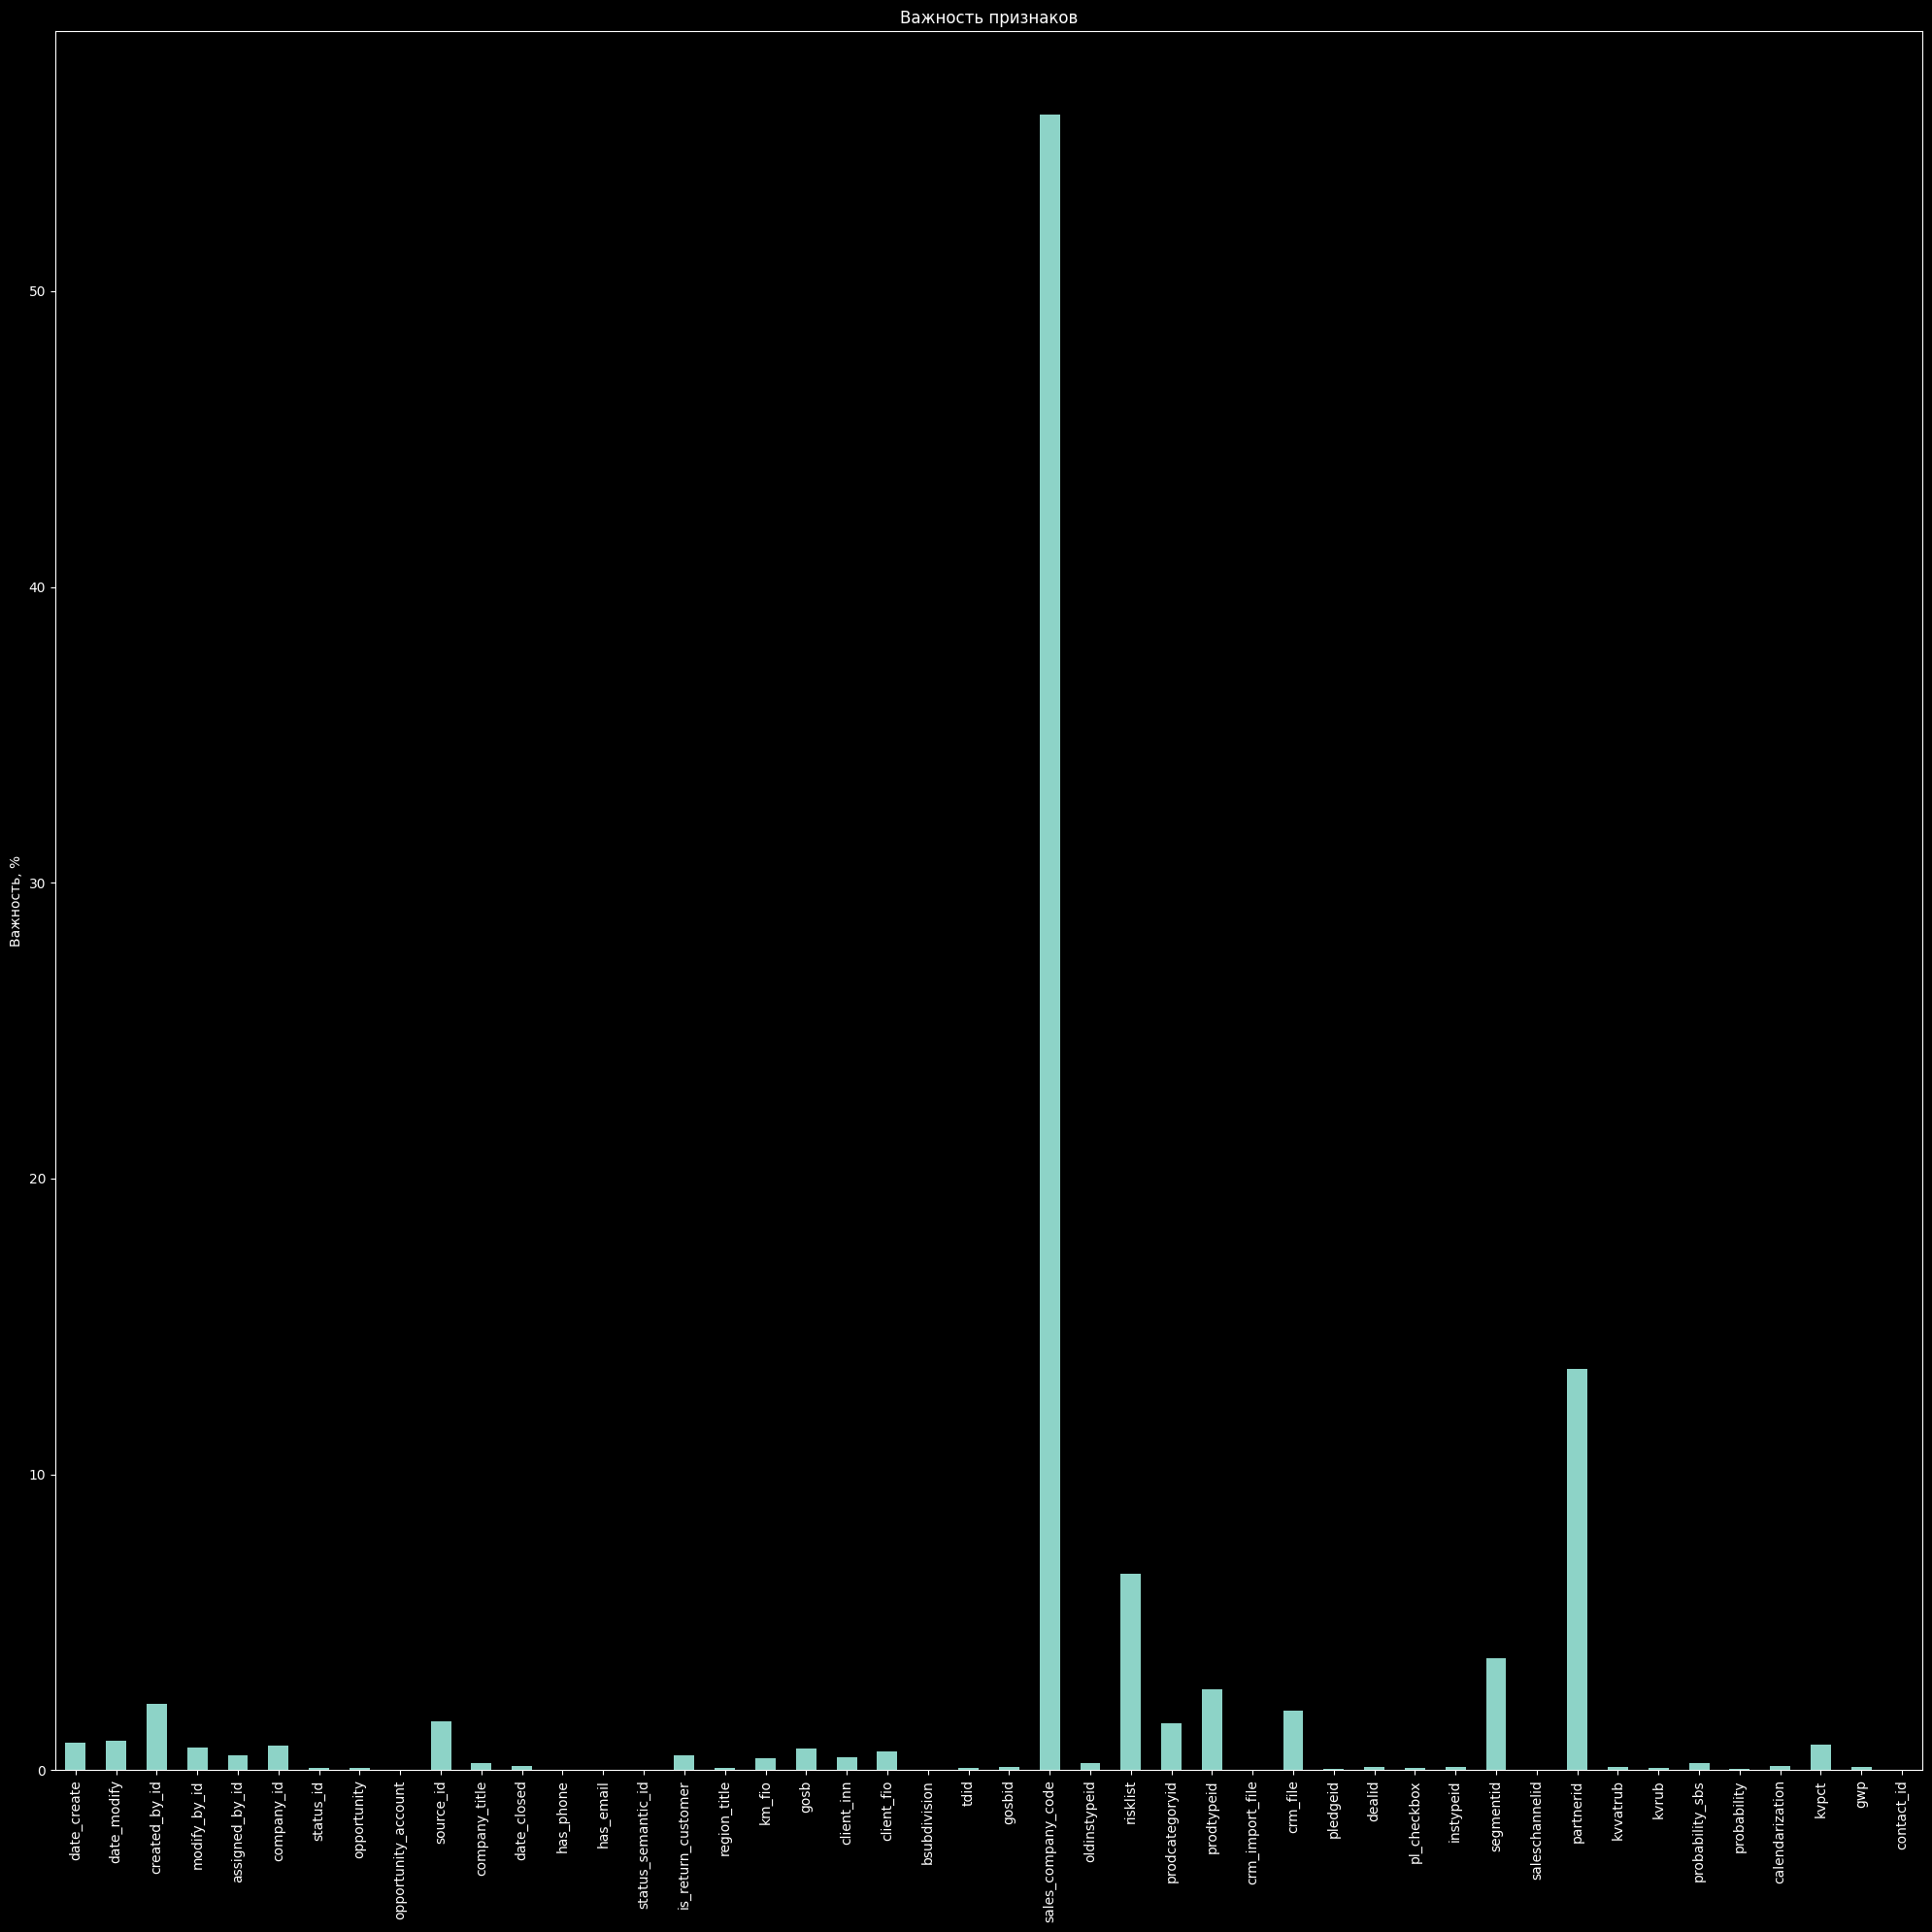

In [35]:
cat_iris_imp = pd.Series(model.get_feature_importance(),
                        df.drop(['opened'], axis=1).columns)
fig, ax = plt.subplots(figsize=(20,20))
cat_iris_imp.plot.bar(ax=ax)
ax.set_title("Важность признаков")
ax.set_ylabel('Важность, %')
fig.tight_layout()

## Using Catboost directions Optuna


In [25]:
def objective(trial,data=X,target=y):
    
    train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.3,random_state=42, stratify=y)


    param = {
        'loss_function': trial.suggest_categorical('loss_function',['Logloss', 'CrossEntropy']), # CAN BE REMOVED  ,"MultiClass", "MultiClassOneVsAll","MultiCrossEntropy","MultiLogloss" 
        'eval_metric' : trial.suggest_categorical('eval_metric',['F1', 'CrossEntropy']),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf',1, 17),
        'bagging_temperature': trial.suggest_float('bagging_temperature',1.00001, 17), #CAN BE REMOVED
        'rsm': trial.suggest_float('rsm', 1e-6, 1.0), #CAN BE REMOVED
        'fold_permutation_block': trial.suggest_int('fold_permutation_block',1, 15),
        'leaf_estimation_iterations': trial.suggest_int('leaf_estimation_iterations',1, 12), #CAN BE REMOVED
        'learning_rate': trial.suggest_float('learning_rate', 1e-7,1),
        'reg_lambda': trial.suggest_float('reg_lambda', 1.0, 12), #CAN BE REMOVED
        'leaf_estimation_backtracking': trial.suggest_categorical('leaf_estimation_backtracking', ['No','AnyImprovement']),
        'depth': trial.suggest_int('depth',1, 16),
        'allow_const_label': trial.suggest_categorical('allow_const_label', [True, False]),
        'fold_len_multiplier': trial.suggest_float('fold_len_multiplier', 1, 12),
        'score_function': trial.suggest_categorical('score_function', ['Cosine', 'L2']),

        'boosting_type': trial.suggest_categorical('boosting_type', ['Ordered', 'Plain']),

        'langevin': trial.suggest_categorical('langevin', [True, False]),

        'iterations': trial.suggest_int('iterations', 2000, 7000),
        'max_bin': trial.suggest_int('max_bin', 90, 600,1),

        #"used_ram_limit": "12gb",



    }

    
    
    if param['loss_function'] not in ["MultiCrossEntropy","MultiLogloss", 'CrossEntropy']:
      param['auto_class_weights']= trial.suggest_categorical('auto_class_weights', ['None','Balanced','SqrtBalanced'])

    if param["boosting_type"] == "Ordered":
      param['grow_policy']= 'SymmetricTree'

    if param["boosting_type"] == "Plain":
      param['grow_policy']= trial.suggest_categorical('grow_policy', ['SymmetricTree','Depthwise','Lossguide'])    


    if param["grow_policy"] != "Lossguide":
      param['sampling_frequency']= trial.suggest_categorical('sampling_frequency', ['PerTree','PerTreeLevel'])


    if param["langevin"]==True:
      param["posterior_sampling"] = trial.suggest_categorical('posterior_sampling', [True, False])
  
      if param["posterior_sampling"] == True:
        param['model_shrink_mode']= 'Constant'

      else:
        param['model_shrink_mode']= trial.suggest_categorical('model_shrink_mode', ['Constant', 'Decreasing'])


    #END OF SETTINGS

    print(param)
    model = cb.CatBoostClassifier(**param) 
    model.fit(train_x,train_y,eval_set=[(test_x,test_y)],early_stopping_rounds=500,verbose=False)


    #preds = model.predict(test_x)
    
    #rmse = mean_squared_error(test_y, preds,squared=False)
    #return (model.score(test_x , test_y))

    ### ANOTHER METHOD ###

    preds = model.predict(test_x)
    pred_labels = np.rint(preds)
    accuracy = sklearn.metrics.balanced_accuracy_score(test_y, pred_labels) #OR ROC_AUG OR accuracy_score

    preds_train = model.predict(train_x)
    pred_labels_train = np.rint(preds_train)
  
    joblib.dump(study, 'catboost_leads_directions.pkl')

    return accuracy , sklearn.metrics.accuracy_score(test_y, pred_labels) , sklearn.metrics.balanced_accuracy_score(train_y, pred_labels_train), sklearn.metrics.accuracy_score(train_y, pred_labels_train)

In [26]:
def logging_callback(study, frozen_trial):
    previous_best_value = study.user_attrs.get("previous_best_value", None)
    if previous_best_value != study.best_value:
        study.set_user_attr("previous_best_value", study.best_value)
        print(
            "\nAHTUNG\nTrial {} finished with best value: {} and parameters: {}.\n ".format(
            frozen_trial.number,
            frozen_trial.value,
            frozen_trial.params,
            )
        )

In [ ]:
%%time

if os.path.isfile('catboost_leads_directions.pkl'):
  study = joblib.load('catboost_leads_directions.pkl')
else:
    sampler = optuna.multi_objective.samplers.MOTPEMultiObjectiveSampler()
    study = optuna.create_study(directions=['maximize','maximize','maximize','maximize'], sampler=sampler)#,pruner=optuna.pruners.MedianPruner(n_warmup_steps=5))

study.optimize(objective, n_trials=1_000, #gc_after_trial=True,
              show_progress_bar=True, n_jobs=-1, callbacks=[logging_callback])

In [25]:
study = joblib.load('catboost_leads_directions.pkl')

In [ ]:
optuna.visualization.plot_optimization_history(study)


In [ ]:
optuna.visualization.plot_parallel_coordinate(study)


In [ ]:
optuna.visualization.plot_slice(study)


In [ ]:
print('Number of finished trials:', len(study.  trials))
print('Best trial:', study.best_trial.params)

Number of finished trials: 35
Best trial: {'loss_function': 'MultiLogloss', 'min_data_in_leaf': 2, 'bagging_temperature': 1.585664075268137, 'rsm': 0.5917735538697605, 'fold_permutation_block': 1, 'leaf_estimation_iterations': 2, 'learning_rate': 0.6964507381860883, 'reg_lambda': 3.0755308956530776, 'leaf_estimation_backtracking': 'AnyImprovement', 'depth': 5, 'allow_const_label': False, 'fold_len_multiplier': 11.767974350933722, 'score_function': 'Cosine', 'boosting_type': 'Plain', 'langevin': False, 'iterations': 4225, 'max_bin': 570, 'grow_policy': 'SymmetricTree', 'sampling_frequency': 'PerTree'}


In [ ]:
Best_trial = study.best_trial.params
Best_trial

{'loss_function': 'MultiLogloss',
 'min_data_in_leaf': 2,
 'bagging_temperature': 1.585664075268137,
 'rsm': 0.5917735538697605,
 'fold_permutation_block': 1,
 'leaf_estimation_iterations': 2,
 'learning_rate': 0.6964507381860883,
 'reg_lambda': 3.0755308956530776,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'depth': 5,
 'allow_const_label': False,
 'fold_len_multiplier': 11.767974350933722,
 'score_function': 'Cosine',
 'boosting_type': 'Plain',
 'langevin': False,
 'iterations': 4225,
 'max_bin': 570,
 'grow_policy': 'SymmetricTree',
 'sampling_frequency': 'PerTree'}

In [ ]:
study.best_trial.value


0.9998986544428333

In [ ]:
model = cb.CatBoostClassifier()  


NameError: name 'cb' is not defined

In [ ]:
model.set_params(**study.best_params)
model.fit(X, y)

In [ ]:
model.get_feature_importance

In [ ]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(20, 20))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(x_test.columns)[sorted_idx])
plt.title('Feature Importance')


In [ ]:
cat_iris_imp = pd.Series(model.get_feature_importance(),
                        df.drop(['opened'], axis=1).columns)
fig, ax = plt.subplots(figsize=(20,20))
cat_iris_imp.plot.bar(ax=ax)
ax.set_title("Важность признаков")
ax.set_ylabel('Важность, %')
fig.tight_layout()

## Using Catboost CV Optuna


In [39]:
def objective(trial,data=X,target=y):
    
    train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.3,random_state=42, stratify=y)


    param = {
      'loss_function': trial.suggest_categorical('loss_function',['Logloss', 'CrossEntropy',"MultiClass", "MultiClassOneVsAll","MultiCrossEntropy","MultiLogloss"]), # CAN BE REMOVED  
      'min_data_in_leaf': trial.suggest_int('min_data_in_leaf',1, 17),
      'bagging_temperature': trial.suggest_float('bagging_temperature',1.00001, 17), #CAN BE REMOVED
      'rsm': trial.suggest_float('rsm', 1e-6, 1.0), #CAN BE REMOVED
      'fold_permutation_block': trial.suggest_int('fold_permutation_block',1, 15),
      'leaf_estimation_iterations': trial.suggest_int('leaf_estimation_iterations',1, 12), #CAN BE REMOVED
      'learning_rate': trial.suggest_float('learning_rate', 1e-7,1),
      'reg_lambda': trial.suggest_float('reg_lambda', 1.0, 12), #CAN BE REMOVED
      'leaf_estimation_backtracking': trial.suggest_categorical('leaf_estimation_backtracking', ['No','AnyImprovement']),
      'depth': trial.suggest_int('depth',1, 16),
      'allow_const_label': trial.suggest_categorical('allow_const_label', [True, False]),
      'fold_len_multiplier': trial.suggest_float('fold_len_multiplier', 1, 12),
      'score_function': trial.suggest_categorical('score_function', ['Cosine', 'L2']),

      'boosting_type': trial.suggest_categorical('boosting_type', ['Ordered', 'Plain']),

      'langevin': trial.suggest_categorical('langevin', [True, False]),

      'iterations': trial.suggest_int('iterations', 2000, 7000),
      'max_bin': trial.suggest_int('max_bin', 90, 600,1),
      'verbose':0
      #"used_ram_limit": "12gb",

    }

    #"""
    if param['loss_function'] not in ["MultiCrossEntropy","MultiLogloss", 'CrossEntropy']:
      param['auto_class_weights']= trial.suggest_categorical('auto_class_weights', ['None','Balanced','SqrtBalanced'])

    if param["boosting_type"] == "Ordered":
      param['grow_policy']= 'SymmetricTree'

    if param["boosting_type"] == "Plain":
      param['grow_policy']= trial.suggest_categorical('grow_policy', ['SymmetricTree','Depthwise','Lossguide'])    


    if param["grow_policy"] != "Lossguide":
      param['sampling_frequency']= trial.suggest_categorical('sampling_frequency', ['PerTree','PerTreeLevel'])


    if param["langevin"]==True:
      param["posterior_sampling"] = trial.suggest_categorical('posterior_sampling', [True, False])
  
      if param["posterior_sampling"] == True:
        param['model_shrink_mode']= 'Constant'

      else:
        param['model_shrink_mode']= trial.suggest_categorical('model_shrink_mode', ['Constant', 'Decreasing'])


    #END OF SETTINGS
    #"""
    print(param)
    model = cb.CatBoostClassifier(**param)  

    joblib.dump(study, 'catboost_leads_CV.pkl')

    return statistics.mean(sklearn.model_selection.cross_val_score(model, train_x, train_y, cv=10, scoring='f1', n_jobs=3))
    # scores = sklearn.model_selection.cross_validate(model, X, y, cv=10, scoring="f1", n_jobs=-1)
    # print(scores['test_score'])
    # return statistics.mean(scores['test_score'])


In [26]:
def logging_callback(study, frozen_trial):
    previous_best_value = study.user_attrs.get("previous_best_value", None)
    if previous_best_value != study.best_value:
        study.set_user_attr("previous_best_value", study.best_value)
        print(
            "\nAHTUNG\nTrial {} finished with best value: {} and parameters: {}.\n ".format(
            frozen_trial.number,
            frozen_trial.value,
            frozen_trial.params,
            )
        )

In [ ]:
%%time

if os.path.isfile('catboost_leads_CV.pkl'):
  study = joblib.load('catboost_leads_CV.pkl')
else:
    sampler = optuna.samplers.TPESampler(multivariate=True)
    study = optuna.create_study(direction='maximize', sampler=sampler)

study.optimize(objective, n_trials=1_000, #gc_after_trial=True,
              show_progress_bar=True, n_jobs=-1, callbacks=[logging_callback])

In [44]:
study = joblib.load('catboost_leads_CV.pkl')

In [45]:
optuna.visualization.plot_optimization_history(study)


[W 2022-10-31 13:25:51,893] There are no complete trials.


In [46]:
optuna.visualization.plot_parallel_coordinate(study)


[W 2022-10-31 13:25:56,060] Your study does not have any completed trials.


In [47]:
optuna.visualization.plot_slice(study)


[W 2022-10-31 13:25:59,831] Your study does not have any completed trials.


In [ ]:
print('Number of finished trials:', len(study.  trials))
print('Best trial:', study.best_trial.params)

Number of finished trials: 35
Best trial: {'loss_function': 'MultiLogloss', 'min_data_in_leaf': 2, 'bagging_temperature': 1.585664075268137, 'rsm': 0.5917735538697605, 'fold_permutation_block': 1, 'leaf_estimation_iterations': 2, 'learning_rate': 0.6964507381860883, 'reg_lambda': 3.0755308956530776, 'leaf_estimation_backtracking': 'AnyImprovement', 'depth': 5, 'allow_const_label': False, 'fold_len_multiplier': 11.767974350933722, 'score_function': 'Cosine', 'boosting_type': 'Plain', 'langevin': False, 'iterations': 4225, 'max_bin': 570, 'grow_policy': 'SymmetricTree', 'sampling_frequency': 'PerTree'}


In [ ]:
Best_trial = study.best_trial.params
Best_trial

{'loss_function': 'MultiLogloss',
 'min_data_in_leaf': 2,
 'bagging_temperature': 1.585664075268137,
 'rsm': 0.5917735538697605,
 'fold_permutation_block': 1,
 'leaf_estimation_iterations': 2,
 'learning_rate': 0.6964507381860883,
 'reg_lambda': 3.0755308956530776,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'depth': 5,
 'allow_const_label': False,
 'fold_len_multiplier': 11.767974350933722,
 'score_function': 'Cosine',
 'boosting_type': 'Plain',
 'langevin': False,
 'iterations': 4225,
 'max_bin': 570,
 'grow_policy': 'SymmetricTree',
 'sampling_frequency': 'PerTree'}

In [ ]:
study.best_trial.value


0.9998986544428333

In [ ]:
model = cb.CatBoostClassifier()  


In [ ]:
model.set_params(**study.best_params)
model.fit(X, y)